## Heart Disease Classifier using the Heart Disease Dataset from UCI Machine Learning repository

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

### Import the data from UCI machine learning repository. We will use the Heart Disease Dataset.

In [2]:
heart = pd.read_csv('processed.cleveland.data', header=None)

In [3]:
heart.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
# Let's check out the shape of the dataframe to see how many rows and columns exist

heart.shape

(303, 14)

In [5]:
# Change the column numbers to column names

heart.columns = ['age',
             'sex',
             'cp',
             'restbp',
             'chol',
             'fbs',
             'restecg',
             'thalach',
             'exang',
             'oldpeak',
             'slope',
             'ca',
             'thal',
             'hd']
heart.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Address Missing data issue

In [6]:
# Indentifying Missing data

heart.isna().sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
hd         0
dtype: int64

In [7]:
# Checking to see if there is anything weired with the datatypes of the features 

heart.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [8]:
# Let's check why ca and thal are object datatypes, if anything funny going on here? What unique values does it have?

heart['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [9]:
heart['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [10]:
# Clearly the '?' in both these features mean they are missing values
# So now we must deal with these missing values

heart['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

So there are 4 missing values in ca feature

In [11]:
heart['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

So there are 2 missing values in ca feature

In [12]:
# Let's also check which rows have these missing values

heart.loc[(heart['ca']=='?') | (heart['thal']=='?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [13]:
# There are only 6 rows with missing values

print(f"Since the percentage of missing values is {round(6/len(heart) * 100,2)}% only so we shall simply delete these rows")

Since the percentage of missing values is 1.98% only so we shall simply delete these rows


In [14]:
# Creating a new dataframe without the rows with '?'

heart_no_missing = heart.loc[(heart['ca']!='?') & (heart['thal']!='?')]
heart_no_missing.shape

(297, 14)

### Since we are only interested in classifying if someone has a heart disease or not so we will convert all label variable values of non-zero into value 1

In [15]:
heart_no_missing.loc[heart_no_missing['hd']>1] = 1
heart_no_missing['hd'].unique()

array([0, 1], dtype=int64)

### Split the dataset into Features and Label

In [16]:
X = heart_no_missing.drop('hd', axis=1).copy()
y = heart_no_missing['hd'].copy()

In [17]:
print(X.shape)
print(y.shape)

(297, 13)
(297,)


### One-Hot encoding categorical features

In [18]:
# Since cp, restecg, slope, thal features are categorical features so we have to one-hot encode them
# otherwise the model will consider them as continuous feature types
# Also, since features like age, fbs, exang are already in binary 0 or 1 format so we need not change anything in these

X_encoded = pd.get_dummies(data=X, columns=['cp','restecg','slope','thal'], drop_first=True)
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,0,0,0,1,0,1,0,1,0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0,0,0,1,0,0,0,0,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,0,1,0,1,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,1,0,0,0,1,0,0,1,0,0


### Splitting the data into train and test subsets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=100)
print(X_train.shape)
print(X_test.shape)

(237, 19)
(60, 19)


### Now we shall build multiple models for our classification task

In [20]:
# Let's try out Decision Tree

from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(random_state=100)
clf.fit(X_train, y_train)
print("Cross Validation Accuracy:", cross_val_score(clf, X_train, y_train, cv=3))
print("\nTest dataset accuracy:", clf.score(X_test, y_test))

Cross Validation Accuracy: [0.73417722 0.67088608 0.81012658]

Test dataset accuracy: 0.7333333333333333


[Text(0.3446969696969697, 0.9545454545454546, 'thalach <= 113.5\ngini = 0.499\nsamples = 237\nvalue = [124, 113]\nclass = No HD'),
 Text(0.1590909090909091, 0.8636363636363636, 'cp_3.0 <= 0.5\ngini = 0.028\nsamples = 71\nvalue = [1, 70]\nclass = Has HD'),
 Text(0.12878787878787878, 0.7727272727272727, 'gini = 0.0\nsamples = 70\nvalue = [0, 70]\nclass = Has HD'),
 Text(0.1893939393939394, 0.7727272727272727, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No HD'),
 Text(0.5303030303030303, 0.8636363636363636, 'thal_7.0 <= 0.5\ngini = 0.384\nsamples = 166\nvalue = [123, 43]\nclass = No HD'),
 Text(0.25, 0.7727272727272727, 'age <= 56.5\ngini = 0.276\nsamples = 121\nvalue = [101, 20]\nclass = No HD'),
 Text(0.09090909090909091, 0.6818181818181818, 'thalach <= 120.0\ngini = 0.121\nsamples = 77\nvalue = [72, 5]\nclass = No HD'),
 Text(0.06060606060606061, 0.5909090909090909, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Has HD'),
 Text(0.12121212121212122, 0.5909090909090909, 'oldpeak

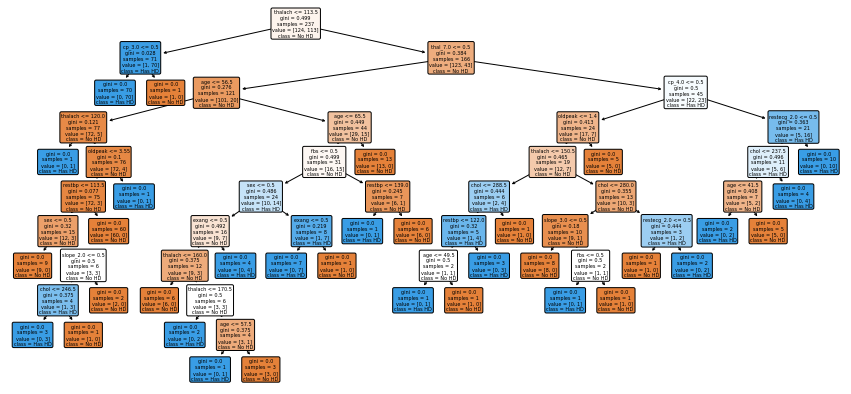

In [21]:
plt.figure(figsize=(15,7))
plot_tree(clf, filled=True, rounded=True, class_names=["No HD", "Has HD"], feature_names=X_train.columns)

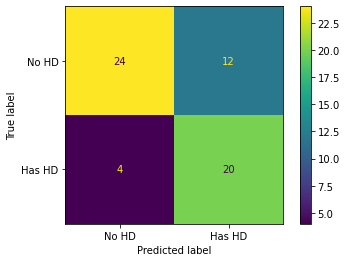

In [22]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=["No HD", "Has HD"]);

### We will now do Cost Complexity Pruning to avoid any overfitting

In [23]:
# We will try to find the optimal value of alpha which controls how much pruning is done

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]  # Excluding the maximum value of alpha because it will prune all the nodes leaving only root node

In [24]:
clf_dts = []

# We will create one DT per value of alpha and store it in the above list
for alpha in ccp_alphas:
    dt = DecisionTreeClassifier(ccp_alpha=alpha, random_state=100)
    dt.fit(X_train, y_train)
    clf_dts.append(dt)    

In [25]:
# We will now score each of the DTs store with both the training and testing datasets

train_accuracies = []
test_accuracies = []

for dt in clf_dts:
    train_accuracies.append(dt.score(X_train, y_train))
    test_accuracies.append(dt.score(X_test, y_test))

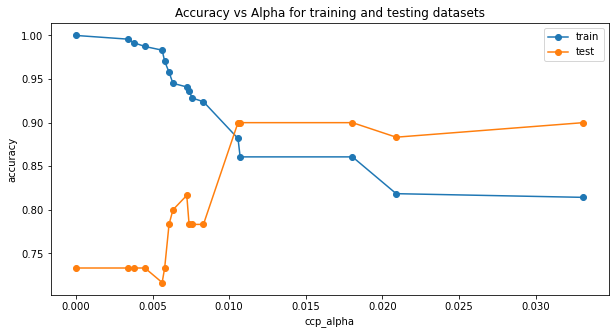

In [26]:
# Now will plot the accuracies

fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('ccp_alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs Alpha for training and testing datasets')
ax.plot(ccp_alphas, train_accuracies, marker='o', label='train')
ax.plot(ccp_alphas, test_accuracies, marker='o', label='test')
ax.legend()

### So ccp_alpha value of 0.01057607 seems to be the optimal value as per the above graph

In [27]:
# Creating the Decision Tree classifier with the optimal ccp_alpha value

clf = DecisionTreeClassifier(ccp_alpha=0.01057607, random_state=100)
clf.fit(X_train, y_train)

print("Cross Validation Accuracy:", np.mean(cross_val_score(clf, X_train, y_train, cv=3)))
print("\nTest dataset accuracy:", clf.score(X_test, y_test))

Cross Validation Accuracy: 0.7426160337552742

Test dataset accuracy: 0.9


[Text(0.3333333333333333, 0.9285714285714286, 'thalach <= 113.5\ngini = 0.499\nsamples = 237\nvalue = [124, 113]\nclass = No HD'),
 Text(0.2222222222222222, 0.7857142857142857, 'gini = 0.028\nsamples = 71\nvalue = [1, 70]\nclass = Has HD'),
 Text(0.4444444444444444, 0.7857142857142857, 'thal_7.0 <= 0.5\ngini = 0.384\nsamples = 166\nvalue = [123, 43]\nclass = No HD'),
 Text(0.2222222222222222, 0.6428571428571429, 'age <= 56.5\ngini = 0.276\nsamples = 121\nvalue = [101, 20]\nclass = No HD'),
 Text(0.1111111111111111, 0.5, 'gini = 0.121\nsamples = 77\nvalue = [72, 5]\nclass = No HD'),
 Text(0.3333333333333333, 0.5, 'age <= 65.5\ngini = 0.449\nsamples = 44\nvalue = [29, 15]\nclass = No HD'),
 Text(0.2222222222222222, 0.35714285714285715, 'gini = 0.499\nsamples = 31\nvalue = [16, 15]\nclass = No HD'),
 Text(0.4444444444444444, 0.35714285714285715, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]\nclass = No HD'),
 Text(0.6666666666666666, 0.6428571428571429, 'cp_4.0 <= 0.5\ngini = 0.5\nsamples = 

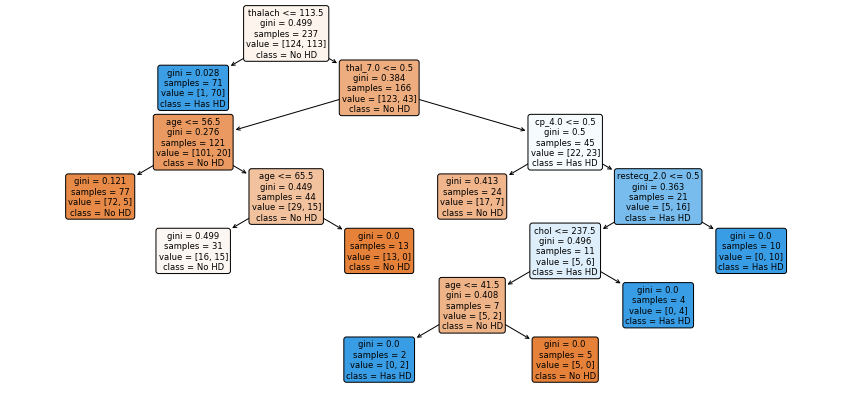

In [28]:
plt.figure(figsize=(15,7))
plot_tree(clf, filled=True, rounded=True, class_names=["No HD", "Has HD"], feature_names=X_train.columns)

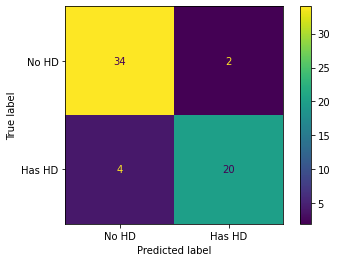

In [29]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=["No HD", "Has HD"]);

### Let's now try other estimators

In [48]:
# Let's try out kNN Classifier

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
print("Cross Validation Accuracy:", cross_val_score(clf, X_train, y_train, cv=3))
print("\nTest dataset accuracy:", clf.score(X_test, y_test))

Cross Validation Accuracy: [0.82278481 0.70886076 0.82278481]

Test dataset accuracy: 0.8166666666666667


In [59]:
# Let's try out kNN Classifier

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print("Cross Validation Accuracy:", cross_val_score(clf, X_train, y_train, cv=3))
print("\nTest dataset accuracy:", clf.score(X_test, y_test))

Cross Validation Accuracy: [0.87341772 0.7721519  0.86075949]

Test dataset accuracy: 0.8833333333333333
